# Optimazation of GD

**`Author : Alhasan Gamal Mahmoud`**


**`Date   : 05 - 03 - 2022`**

**In this Script, I will develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate (Adagrad, RMSProp, and Adam) in order to achieve the linear regression of a set of datapoints.**

## Adagrad
The Adaptive Gradient algorithm, or AdaGrad for short, keeps track of the sum of gradient squared and uses that to adapt the gradient in different directions. Often the equations are expressed in tensors. I will avoid tensors to simplify the language here. For each dimension:

\begin{equation}
V_t = V_{t-1} - (\bigtriangledown W)^2
\end{equation}

\begin{equation}
W_{t+1} = V_{t} - \frac{\eta}{\sqrt{v_{t}} + \epsilon}\bigtriangledown W
\end{equation}

In ML optimization, some features are very sparse. The average gradient for sparse features is usually small so such features get trained at a much slower rate. One way to address this is to set different learning rates for each feature, but this gets messy fast.

AdaGrad addresses this problem using this idea: the more you have updated a feature already, the less you will update it in the future, thus giving a chance for the others features (for example, the sparse features) to catch up. In visual terms, how much you have updated this feature is to say how much you have moved in this dimension, and this notion is captured by the cumulative sum of gradient squared. Notice how in the step-by-step grid illustration above, without the rescaling adjustment (1b), the ball would have moved mostly vertically downwards; with the adjustment (1d), it moves diagonally.

<img src ="1_WRtvrr9Z0QcokiKlgU7xEw.gif">

This property allows AdaGrad (and other similar gradient-squared-based methods like RMSProp and Adam) to escape a saddle point much better. AdaGrad will take a straight path, whereas gradient descent (or relatedly, Momentum) takes the approach of “let me slide down the steep slope first and maybe worry about the slower direction later”. Sometimes, vanilla gradient descent might just stop at the saddle point where gradients in both directions are 0 and be perfectly content there.

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['ggplot'])

In [2]:
# creat random X and y
X = 2 * np.random.rand(100,1)
y = 4 +3 * X + np.random.randn(100,1)
theta = np.array([[4],[3]])

In [3]:
# display shapes of X, y, theta

print(f"X.shape = {X.shape}")
print(f"y.shape = {y.shape}")
print(f"theta.shape = {theta.shape}")

X.shape = (100, 1)
y.shape = (100, 1)
theta.shape = (2, 1)


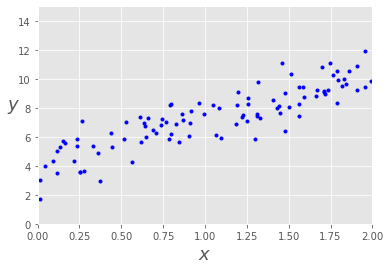

In [4]:
# draw data

plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([0,2,0,15])

In [5]:
# cost function
def ComputeCost(X,y,theta):
    theta = np.squeeze(theta)
    z = np.power(((X @ theta.T) - y),2)
    return np.sum(z) / (2 * len(X))

In [6]:
# get gradient
def GetGradient(X,y,theta):
    pre = X @ theta
    grad = X.T @ (pre - y)
    return grad

In [7]:
def Adagrad(x,y,v,theta):
    
    if len(v)== 0:
        v.append(np.array([[0],[0]]))
        return v

    v.append (v[-1] + np.power(GetGradient(x,y,theta),2))
    return v[-1]

In [8]:
def Batch_Adagrad_GD(X,Y,Theta,lr,iteration):  
    
    cost = []                     
    thetas = []
    h = []
    v = [6]
    vt =[]
    eps=0.0000000000001
    for i in range(iteration):
        thetas.append(Theta)
        h.append(X @ Theta)
     
        cost.append( ComputeCost(X,Y,Theta) )

        vt.append(Adagrad(X,Y,v,Theta))
        vt_sqrt=np.sqrt(vt[-1])
        grad=GetGradient(X,Y,Theta)
        Theta = Theta - (lr * grad)/(vt_sqrt+eps)

        if i > 0:
            if np.abs(cost[i-1] - cost[i]) < 0.0000000001:
                break
        
    return Theta , cost,thetas,h,vt

In [9]:
alpha=0.0001
itera=10

In [10]:
X_b = np.c_[np.ones((len(X),1)),X]
th_op , cost, thetas , h , vt =Batch_Adagrad_GD(X_b,y,theta,alpha,itera)
thetas = np.array(thetas).reshape(len(cost),2)

In [12]:
vt

[array([[548.41159327],
        [839.27168445]]),
 array([[1089.8759696 ],
        [1671.12606269]]),
 array([[1630.66984136],
        [2501.97721809]]),
 array([[2170.91628833],
        [3332.0093101 ]]),
 array([[2710.68879195],
        [4161.33228096]]),
 array([[3250.03753876],
        [4990.02121753]]),
 array([[3788.99959352],
        [5818.13157349]]),
 array([[4327.60377271],
        [6645.70646164]]),
 array([[4865.8733104 ],
        [7472.78064253]]),
 array([[5403.82745526],
        [8299.38291401]])]

In [13]:
cost[-1]

367.8791273238079

In [94]:
# Predict y values using the LR equation 
f = X_b @ th_op


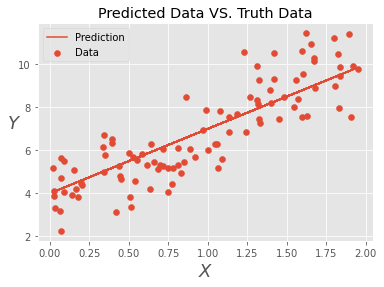

In [95]:
# Plot LR equation output (fitted line) with the original data (scatter plot of X,y)

plt.plot(X_b[:,1],f,label='Prediction')

plt.scatter(X,y,label='Data')

plt.legend()

plt.xlabel("$X$",fontsize=18)

plt.ylabel("$Y$",rotation=0,fontsize=18)

plt.title("Predicted Data VS. Truth Data")

plt.show()

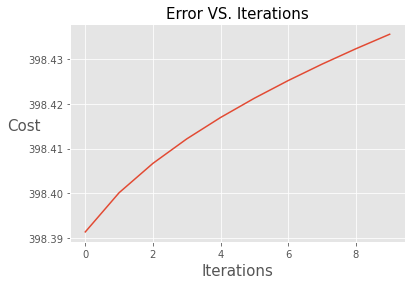

In [96]:
# draw Error Graph
plt.plot(cost)
plt.xlabel("Iterations",fontsize=15)
plt.ylabel("Cost",rotation=0,fontsize=15)
plt.title("Error VS. Iterations",fontsize=15)
plt.show()

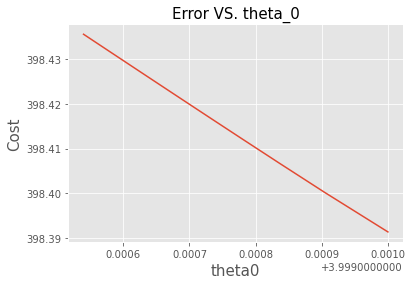

In [97]:
# draw Error and theta0 graph 
plt.plot(thetas[:,0],cost)
plt.xlabel("theta0",fontsize=15)
plt.ylabel("Cost",fontsize=15)
plt.title("Error VS. theta_0",fontsize=15)
plt.show()

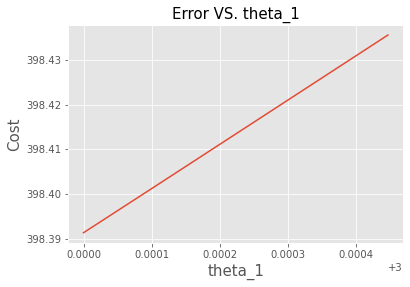

In [98]:
# draw Error and theta1 graph 
plt.plot(thetas[:,1],cost)
plt.xlabel("theta_1",fontsize=15)
plt.ylabel("Cost",fontsize=15)
plt.title("Error VS. theta_1",fontsize=15)
plt.show()

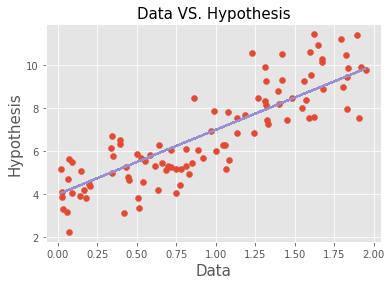

In [99]:
#draw Error and Hypothesis graph 
plt.scatter(X,y,label='Data')
for i in  h:
    plt.plot(X,i)

plt.xlabel("Data",fontsize=15)
plt.ylabel("Hypothesis",fontsize=15)
plt.title("Data VS. Hypothesis",fontsize=15)
plt.show()

In [100]:
from sklearn.metrics import r2_score

r2_score(y,f)

0.7376852935268879

## RMSProp
The problem of AdaGrad, however, is that it is incredibly slow. This is because the sum of gradient squared only grows and never shrinks. RMSProp (for Root Mean Square Propagation) fixes this issue by adding a decay factor.

\begin{equation}
V_t = \beta * V_{t-1} - (1 - \beta) * (\bigtriangledown W)^2
\end{equation}

\begin{equation}
W_{t+1} = V_{t} - \frac{\eta}{\sqrt{v_{t}} + \epsilon}\bigtriangledown W
\end{equation}

More precisely, the sum of gradient squared is actually the decayed sum of gradient squared. The decay rate is saying only recent gradient² matters, and the ones from long ago are basically forgotten. As a side note, the term “decay rate” is a bit of a misnomer. Unlike the decay rate we saw in momentum, in addition to decaying, the decay rate here also has a scaling effect: it scales down the whole term by a factor of (1 - decay_rate). In other words, if the decay_rate is set at 0.99, in addition to decaying, the sum of gradient squared will be sqrt(1 - 0.99) = 0.1 that of AdaGrad, and thus the step is on the order of 10x larger for the same learning rate.

<img src="1__4zyVpZazh4OSIzprmYQEw.gif">

To see the effect of the decaying, in this head-to-head comparison, AdaGrad white) keeps up with RMSProp (green) initially, as expected with the tuned learning rate and decay rate. But the sums of gradient squared for AdaGrad accumulate so fast that they soon become humongous (demonstrated by the sizes of the squares in the animation). They take a heavy toll and eventually AdaGrad practically stops moving. RMSProp, on the other hand, has kept the squares under a manageable size the whole time, thanks to the decay rate. This makes RMSProp faster than AdaGrad.

In [2]:
# creat random X and y
X = 2 * np.random.rand(100,1)
y = 4 +3 * X + np.random.randn(100,1)
theta = np.array([[4],[3]])

In [3]:
# display shapes of X, y, theta

print(f"X.shape = {X.shape}")
print(f"y.shape = {y.shape}")
print(f"theta.shape = {theta.shape}")

X.shape = (100, 1)
y.shape = (100, 1)
theta.shape = (2, 1)


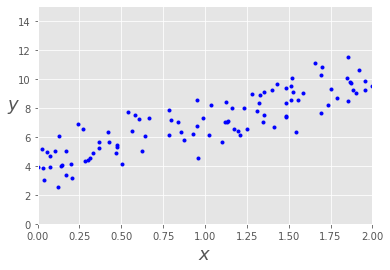

In [4]:
# draw data

plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([0,2,0,15])

In [5]:
# cost function
def ComputeCost(X,y,theta):
    theta = np.squeeze(theta)
    z = np.power(((X @ theta.T) - y),2)
    return np.sum(z) / (2 * len(X))

In [6]:
# get gradient
def GetGradient(X,y,theta):
    pre = X @ theta
    grad = X.T @ (pre - y)
    return grad

In [7]:
def RMS(x,y,v,theta,gama):
    
    if len(v)== 0:
        v.append(np.array([[0],[0]]))
        return v

    v.append (((gama*v[-1]) + ((1-gama)*np.power(GetGradient(x,y,theta),2))))
    return v[-1]

In [8]:
def Batch_RMS_GD(X,Y,Theta,lr,iteration,gama):  
    cost = []  
    thetas = []
    h=[]
    vt=[]
    v = [4]
    eps=0.0000000000001
    for i in range(iteration):
        thetas.append(Theta)
        h.append(X @ Theta)
     
        cost.append( ComputeCost(X,Y,Theta) )

        vt.append(RMS(X,Y,v,Theta,gama))
        vt_sqrt=np.sqrt(vt[-1])
        grad=GetGradient(X,Y,Theta)
        Theta = Theta - (lr * grad)/(vt_sqrt+eps)
        if i > 0:
            if np.abs(cost[i-1] - cost[i]) < 0.0000000001:
                break
        if np.linalg.norm(grad) < 0.00000001:
            break;
    return Theta , cost,thetas,h,vt

In [9]:
alpha=0.4
itera=10
gama=0.4

In [11]:
X_b = np.c_[np.ones((len(X),1)),X]
th_op , cost, thetas , h , vt =Batch_RMS_GD(X_b,y,theta,alpha,itera,gama)
thetas = np.array(thetas).reshape(len(cost),2)

In [12]:
cost[-1]

401.3685081429903

In [17]:
# Predict y values using the LR equation 
f = X_b @ th_op

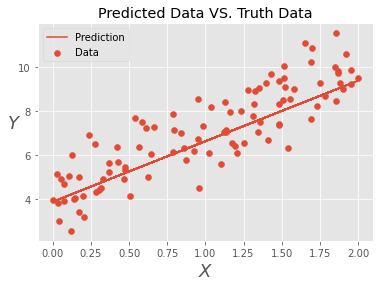

In [18]:
# Plot LR equation output (fitted line) with the original data (scatter plot of X,y)

plt.plot(X_b[:,1],f,label='Prediction')

plt.scatter(X,y,label='Data')

plt.legend()

plt.xlabel("$X$",fontsize=18)

plt.ylabel("$Y$",rotation=0,fontsize=18)

plt.title("Predicted Data VS. Truth Data")

plt.show()

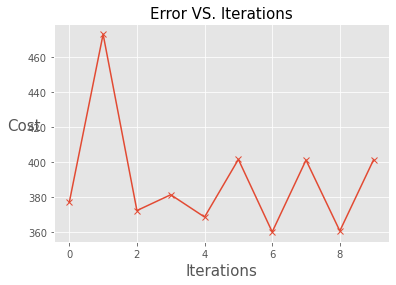

In [20]:
# draw Error Graph
plt.plot(cost,marker='x')
plt.xlabel("Iterations",fontsize=15)
plt.ylabel("Cost",rotation=0,fontsize=15)
plt.title("Error VS. Iterations",fontsize=15)
plt.show()

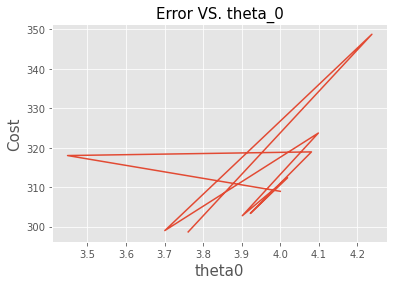

In [49]:
# draw Error and theta0 graph 
plt.plot(thetas[:,0],cost)
plt.xlabel("theta0",fontsize=15)
plt.ylabel("Cost",fontsize=15)
plt.title("Error VS. theta_0",fontsize=15)
plt.show()

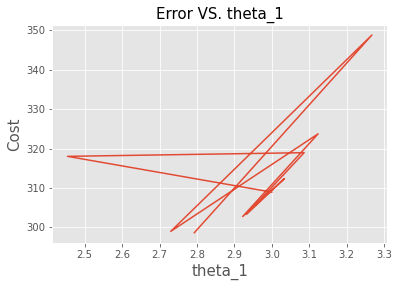

In [50]:
# draw Error and theta1 graph 
plt.plot(thetas[:,1],cost)
plt.xlabel("theta_1",fontsize=15)
plt.ylabel("Cost",fontsize=15)
plt.title("Error VS. theta_1",fontsize=15)
plt.show()

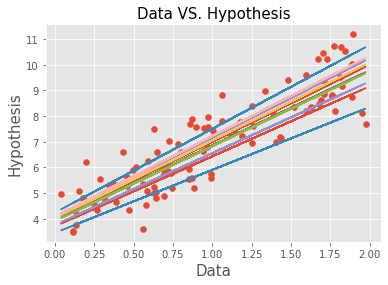

In [51]:
#draw Error and Hypothesis graph 
plt.scatter(X,y,label='Data')
for i in  h:
    plt.plot(X,i)

plt.xlabel("Data",fontsize=15)
plt.ylabel("Hypothesis",fontsize=15)
plt.title("Data VS. Hypothesis",fontsize=15)
plt.show()

In [52]:
from sklearn.metrics import r2_score

r2_score(y,f)

0.7508422189184023

## Adam
Adam (short for Adaptive Moment Estimation) takes the best of both worlds of Momentum and RMSProp. Adam empirically works well, and thus in recent years, it is commonly the go-to choice of deep learning problems.

\begin{equation}
M_t = \beta_1 * M_{t-1} - (1 - \beta_1) * (\bigtriangledown W)
\end{equation}

\begin{equation}
V_t = \beta_2 * V_{t-1} - (1 - \beta_2) * (\bigtriangledown W)^2
\end{equation}

\begin{equation}
M_t = \frac{m_t}{1-\beta_1^t}
\end{equation}

\begin{equation}
V_t = \frac{V_t}{1-\beta_2^t}
\end{equation}

Beta1 is the decay rate for the first moment, sum of gradient (aka momentum), commonly set at 0.9. Beta 2 is the decay rate for the second moment, sum of gradient squared, and it is commonly set at 0.999.

<img src ="1_yBJ4lxoiD6iDjoLBepgkHw.png">

Adam gets the speed from momentum and the ability to adapt gradients in different directions from RMSProp. The combination of the two makes it powerful.

In [279]:
# creat random X and y
X = 2 * np.random.rand(100,1)
y = 4 +3 * X + np.random.randn(100,1)
theta = np.array([[4],[3]])

In [280]:
# display shapes of X, y, theta

print(f"X.shape = {X.shape}")
print(f"y.shape = {y.shape}")
print(f"theta.shape = {theta.shape}")

X.shape = (100, 1)
y.shape = (100, 1)
theta.shape = (2, 1)


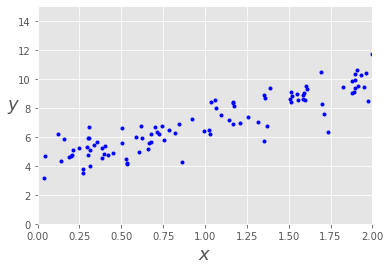

In [281]:
# draw data

plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([0,2,0,15])

In [282]:
# cost function
def ComputeCost(X,y,theta):
    theta = np.squeeze(theta)
    z = np.power(((X @ theta.T) - y),2)
    return np.sum(z) / (2 * len(X))

In [283]:
# get gradient
def GetGradient(X,y,theta):
    pre = X @ theta
    grad = X.T @ (pre - y)
    return grad

In [284]:
def Adam(x,y,theta,v,m,gama1,gama2):
    if len(m)== 0 & len(v)==0:
        m.append(np.array([[0],[0]]))
        v.append(np.array([[0],[0]]))
        return v,m

    m.append((gama1 * v[-1]) + ((1-gama1 )* GetGradient(x,y,theta)))
   
    v.append (((gama2*v[-1]) + ((1-gama2)*np.power(GetGradient(x,y,theta),2))))
    return v[-1],m[-1]
    

In [320]:
def Batch_Adam_GD(X,Y,Theta,lr,iteration,gama1,gama2):  
    cost = []                   
    thetas = []
    h=[]
    vt=[]
    mt=[]
    eps=0.0000000000001
    for i in range(iteration):
        thetas.append(Theta)
        h.append(X @ Theta)
     
#         cost.append( ComputeCost(X,Y,Theta) )


        v,m=Adam(X,Y,Theta,vt,mt,gama1,gama2)
        vt.append(v[-1]* (1/(1-gama2**(i+1))))
        mt.append(m[-1]* (1/(1-gama1**(i+1))))
        Theta = Theta - (lr * mt[-1])/(np.sqrt(vt[-1])+eps)
        cost.append( ComputeCost(X,Y,Theta) )
        
        if i > 0:
            if np.abs(cost[-1] - cost[-2]) < 0.01:
                break
            if np.linalg.norm(GetGradient(X,Y,Theta)) < 0.01:
                break;
        
    return Theta, cost,thetas,h

In [321]:
alpha=0.001
gama1=0.4
gama2=0.4
itera=100

In [322]:
 X_b = np.c_[np.ones((len(X),1)),X]
th_op , cost, thetas , h  =Batch_Adam_GD(X_b,y,theta,alpha,itera,gama1,gama2)
thetas = np.array(thetas).reshape(len(cost),2)

In [323]:
cost[-1]

349.3602559165634

In [324]:
# Predict y values using the LR equation 
f = X_b @ th_op

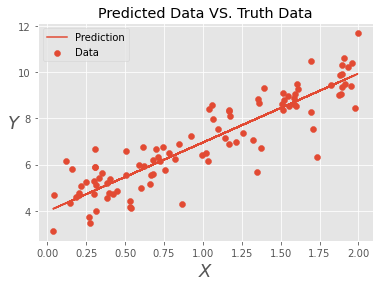

In [325]:
# Plot LR equation output (fitted line) with the original data (scatter plot of X,y)

plt.plot(X_b[:,1],f,label='Prediction')

plt.scatter(X,y,label='Data')

plt.legend()

plt.xlabel("$X$",fontsize=18)

plt.ylabel("$Y$",rotation=0,fontsize=18)

plt.title("Predicted Data VS. Truth Data")

plt.show()

In [326]:
len(cost)

15

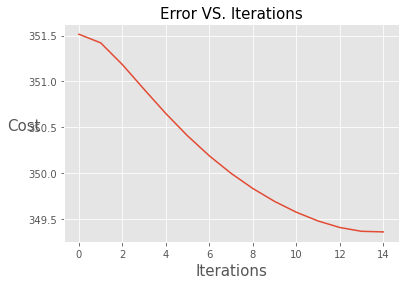

In [327]:
# draw Error Graph
plt.plot(cost)
plt.xlabel("Iterations",fontsize=15)
plt.ylabel("Cost",rotation=0,fontsize=15)
plt.title("Error VS. Iterations",fontsize=15)
plt.show()

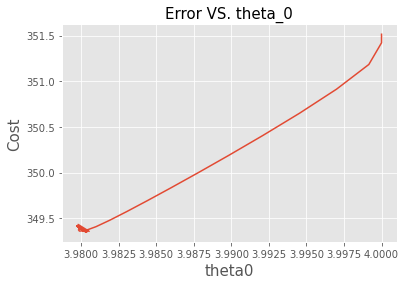

In [316]:
# draw Error and theta0 graph 
plt.plot(thetas[:,0],cost)
plt.xlabel("theta0",fontsize=15)
plt.ylabel("Cost",fontsize=15)
plt.title("Error VS. theta_0",fontsize=15)
plt.show()

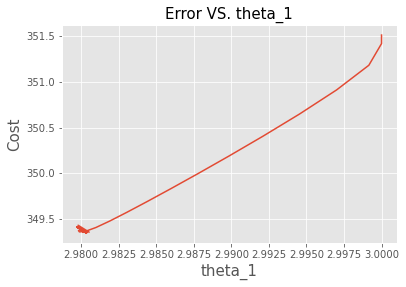

In [317]:
# draw Error and theta1 graph 
plt.plot(thetas[:,1],cost)
plt.xlabel("theta_1",fontsize=15)
plt.ylabel("Cost",fontsize=15)
plt.title("Error VS. theta_1",fontsize=15)
plt.show()

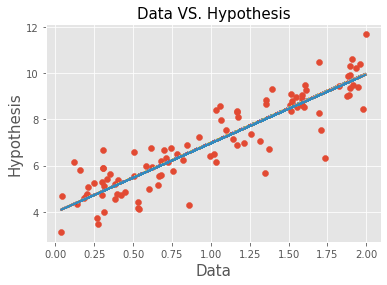

In [318]:
#draw Error and Hypothesis graph 
plt.scatter(X,y,label='Data')
for i in  h:
    plt.plot(X,i)

plt.xlabel("Data",fontsize=15)
plt.ylabel("Hypothesis",fontsize=15)
plt.title("Data VS. Hypothesis",fontsize=15)
plt.show()

In [319]:
from sklearn.metrics import r2_score

r2_score(y,f)

0.8028653612201322